In [2]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df=pd.read_csv('../../data/processed/kurla_cleaned.csv')
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,WD,WS,RH,Ozone,AT,HOUR,MONTH
0,2019-06-01 00:00:00,17.415577,54.232500,62.786759,15.821609,17.372165,0.317810,173.206449,1.263364,89.006636,18.702381,25.836916,0,6
1,2019-06-01 01:00:00,15.726857,54.472000,63.474352,15.219765,17.410206,0.299714,170.473832,1.278972,89.966449,18.615714,25.578131,1,6
2,2019-06-01 02:00:00,15.877619,50.195644,62.925794,15.889747,17.446289,0.271250,169.701698,1.249245,90.481981,19.267300,25.416038,2,6
3,2019-06-01 03:00:00,15.825243,50.439200,61.615556,15.370274,17.462604,0.255962,160.410472,1.321792,90.503491,18.845673,25.364811,3,6
4,2019-06-01 04:00:00,14.995545,52.020104,62.458962,15.715143,17.578229,0.247596,157.883462,1.298750,90.831346,18.971250,25.233269,4,6


# **LinearRegression** 

In [4]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [27]:
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'O',
 'HOUR',
 'WS',
 'WD',
 'AT']
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features

In [31]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (23569, 6)
Test data size: (10102, 6)


In [32]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [33]:
print('Intercept:',lr_model.intercept_)
# represents the expected value of the target variable when all predictor variables are equal to zero
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))
#  the coefficient value represents the slope of the line that best fits the relationship between a predictor variable and the target variable. Specifically, the coefficient value indicates the change in the expected value of the target variable for a one-unit change in the corresponding predictor variable, holding all other predictor variables constant.

Intercept: 37.718340007181794
--------------------------------
Slope:


[('CO', 15.960735221916817),
 ('Ozone', 3.888909295720861),
 ('PM2.5', 7.48038026170303),
 ('PM10', 3.265721405028467),
 ('NO', -4.607350930743044),
 ('WD', 4.21825194549372)]

In [34]:
y_pred=lr_model.predict(X_test)                      #predict using the model
x_pred=lr_model.predict(X_train)                      #predict using the model
lrRmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('RMSE of predicted NO in LR model:',lrRmse)

RMSE of predicted NO in LR model: 22.433776523238365


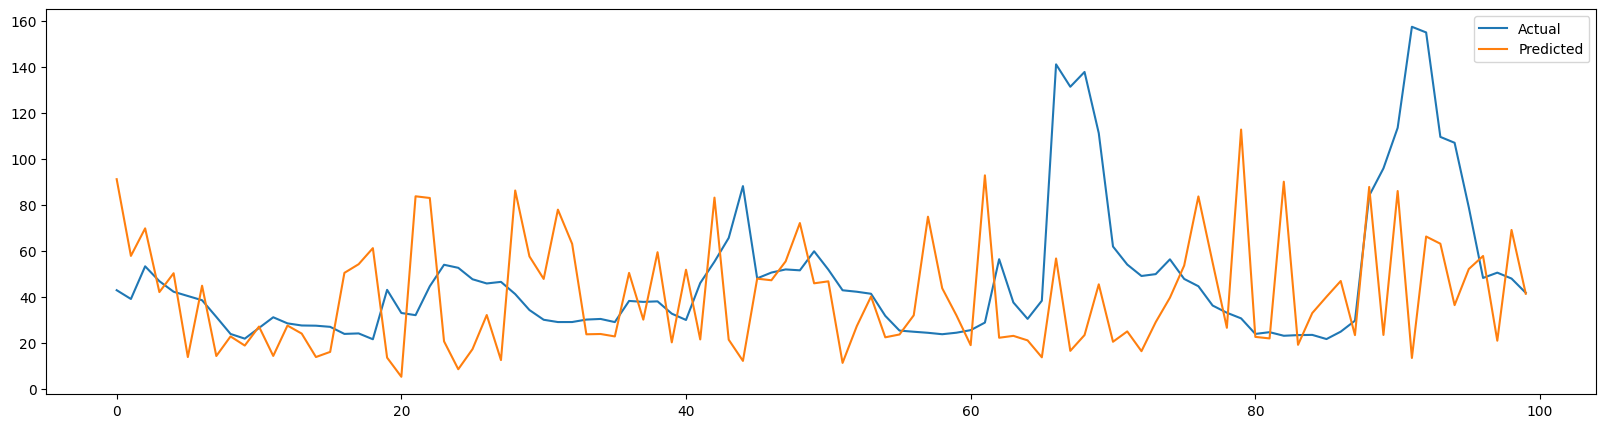

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred, y_pred])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **Random Forest**

In [36]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error   
from sklearn.ensemble import RandomForestRegressor           

col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(X_train,y_train)           
y_pred_rf=rf_model.predict(X_test)   
x_pred_rf=rf_model.predict(X_train)   
RF_rmse=np.sqrt(mean_squared_error(y_test,y_pred_rf))      
print('RMSE of predicted PM2.5 in RF model:',RF_rmse)

Training data size: (23569, 6)
Test data size: (10102, 6)
RMSE of predicted PM2.5 in RF model: 16.394270303676223


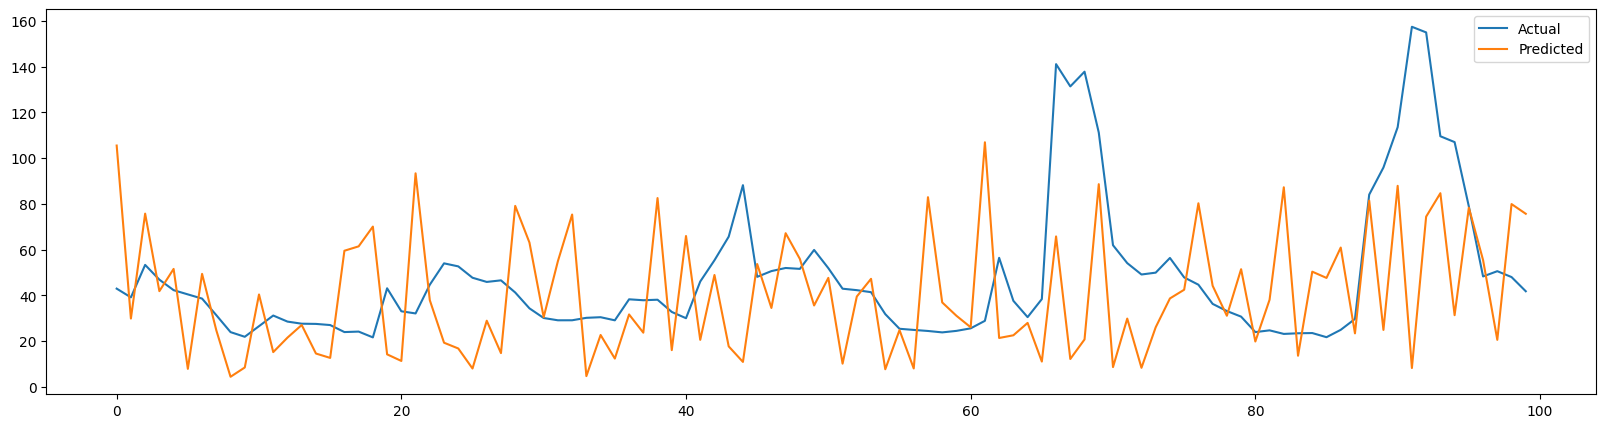

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_rf, y_pred_rf])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeRegressor
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)
y_pred_dtone=dt_model.predict(X_test)
x_pred_dtone=dt_model.predict(X_train)
DT_rmse=np.sqrt(mean_squared_error(y_test,y_pred_dtone))
print('RMSE of predicted PM2.5 in DT model:',DT_rmse)

Training data size: (23569, 6)
Test data size: (10102, 6)
RMSE of predicted PM2.5 in DT model: 23.134616403380274


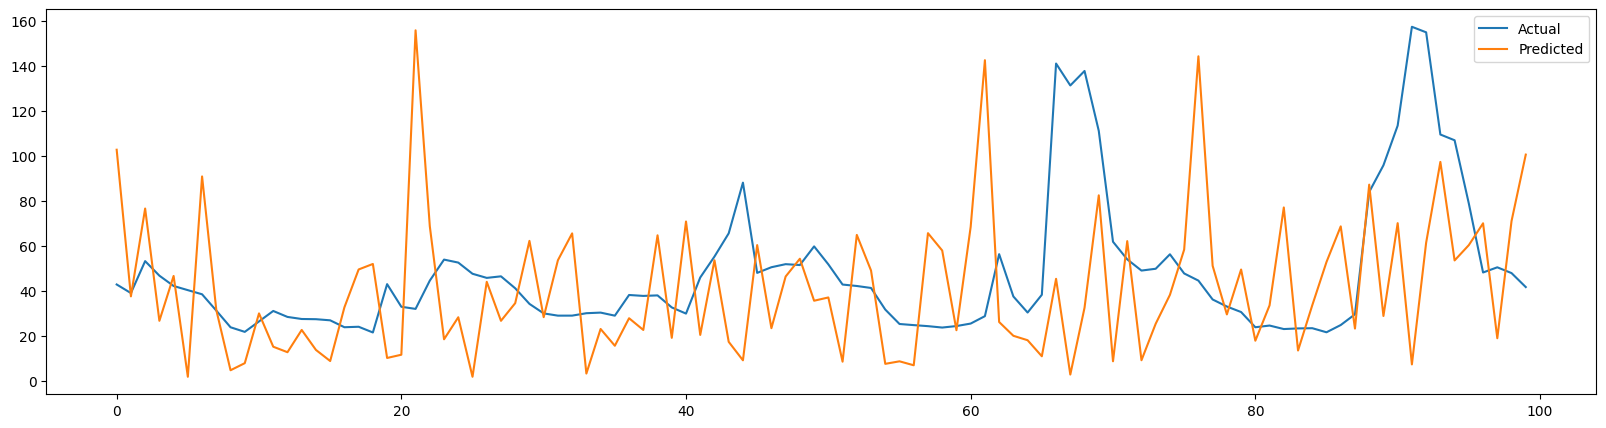

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_dtone, y_pred_dtone])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **SVM model**

In [40]:
from sklearn.svm import SVR
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
sv_reg=SVR()
sv_model=sv_reg.fit(X_train,y_train) 
y_pred_sv=sv_model.predict(X_test) 
x_pred_sv=sv_model.predict(X_train) 
SV_rmse=np.sqrt(mean_squared_error(y_test,y_pred_sv))
print('RMSE of predicted PM2.5 in SVM model:',SV_rmse)

Training data size: (23569, 6)
Test data size: (10102, 6)
RMSE of predicted PM2.5 in SVM model: 19.33807979602904


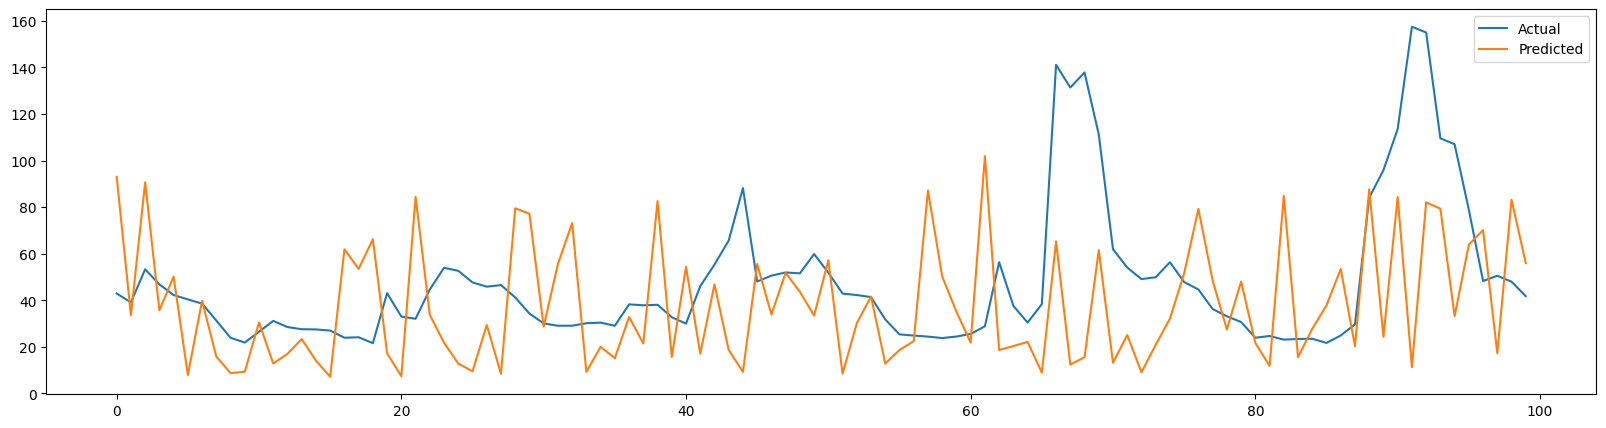

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_sv, y_pred_sv])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **LSTM model**

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
n_steps = 1
n_features = X_train.shape[1]
X_train_lstm = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test_lstm = X_test.reshape((X_test.shape[0], n_steps, n_features))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse') 

lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_lstm = lstm_model.predict(X_test_lstm)
x_pred_lstm = lstm_model.predict(X_train_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print('Training data size:', X_train_lstm.shape)
print('Test data size:', X_test_lstm.shape)
print('RMSE of predicted PM2.5 in LSTM model:', lstm_rmse)


2023-04-24 20:10:46.146658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 20:10:48.063398: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 20:10:48.068939: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 20:10:51.732679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


737/737 [==============================] - 3s 4ms/step
Training data size: (23569, 1, 6)
Test data size: (10102, 1, 6)
RMSE of predicted PM2.5 in LSTM model: 19.76657968432861


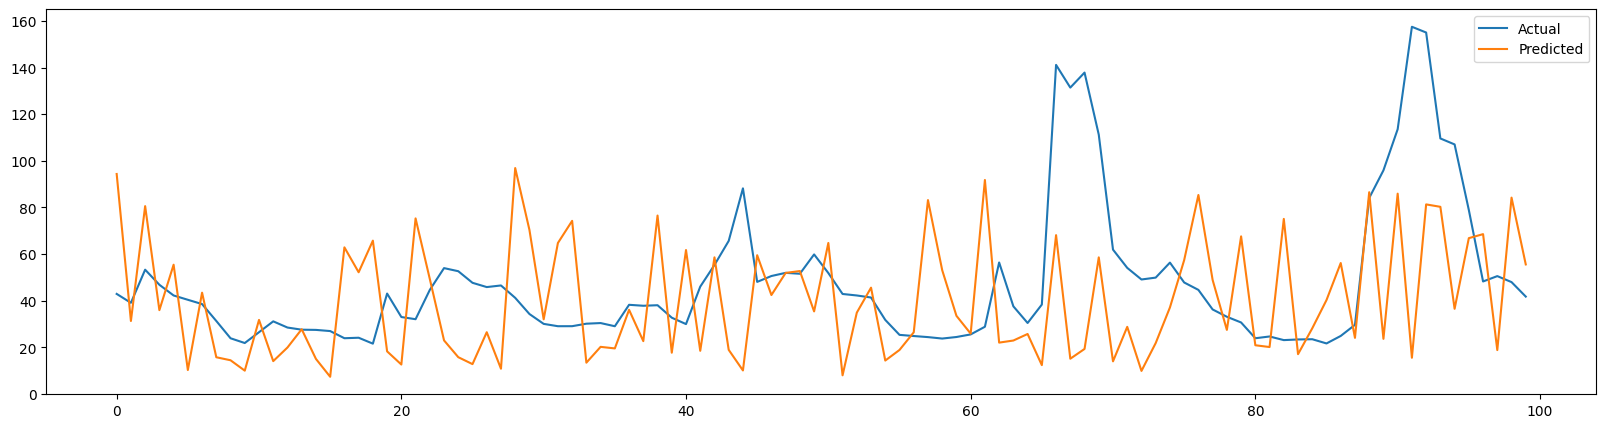

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_lstm, y_pred_lstm])[30500:30600], label='Predicted')
plt.legend()
plt.show()

# **Gradient boosting**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
col_=['CO',
 'Ozone',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'WD']
X=df[col_].drop('NO2',axis=1)     #X-input features
y=df['NO2']                    #y-input features 
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
gb_reg = GradientBoostingRegressor()
gb_model = gb_reg.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
x_pred_gb = gb_model.predict(X_train)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)
GB_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('RMSE of predicted PM2.5 in gradient boosting model:', GB_rmse)

Training data size: (23569, 6)
Test data size: (10102, 6)
RMSE of predicted PM2.5 in gradient boosting model: 18.116388791495638


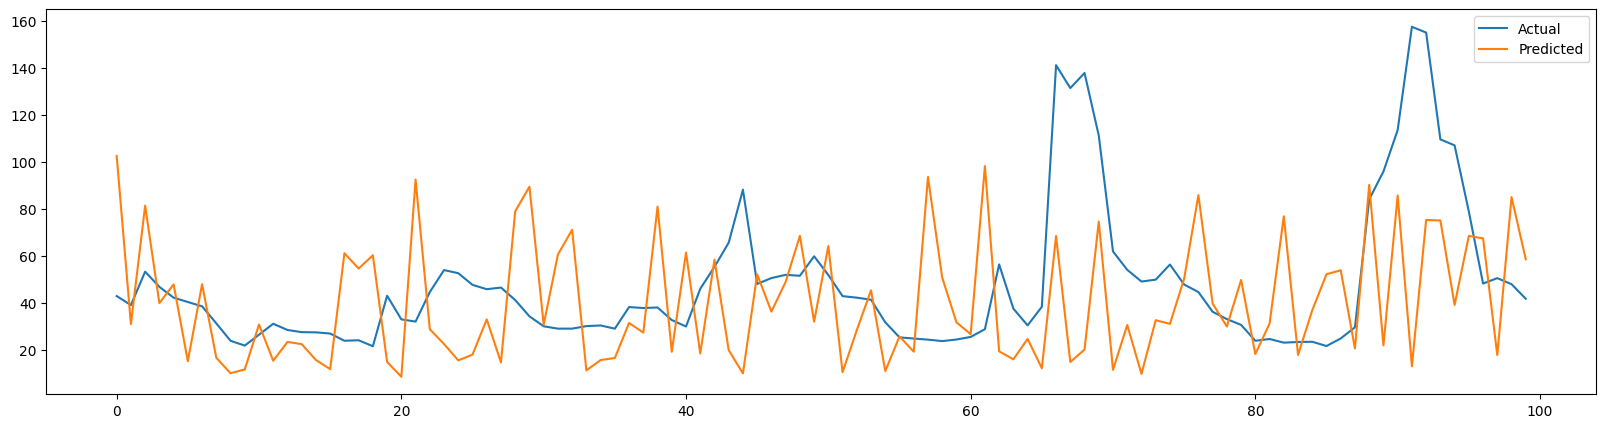

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['NO2'].values[30500:30600], label='Actual')
plt.plot(np.concatenate([x_pred_gb, y_pred_gb])[30500:30600], label='Predicted')
plt.legend()
plt.show()